In [27]:
import tensorflow as tf
import numpy as np

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

# Ejemplo Perceptrón con sigmoide (regresión logística)

In [29]:
X=np.asarray([[0,0],[0,1],[1,0],[1,1]])
Y=np.asarray([[0],[0],[0],[1]])

Declaracion de variables

In [30]:
input_size=2
output_layer_size=1
#Los placeholders son para los datos de entrada
x = tf.placeholder(tf.float32, [None, input_size])
y_ = tf.placeholder(tf.float32, [None, output_layer_size]) #la y real
#La variables para lo que se va a ir calculando y modificando en el camino
W_layer1=tf.Variable(tf.random_uniform([input_size,output_layer_size], -1, 1), name="W_layer1")
b_layer1 = tf.Variable(tf.zeros([output_layer_size]), name="b_layer1")


Operaciones, grafo

In [31]:
y = tf.nn.sigmoid(tf.matmul(x,W_layer1)+b_layer1) #la de nuestra
lossfn = tf.reduce_mean(tf.reduce_sum((y_-y)**2)) #cuadratico
#lossfn= tf.reduce_mean(( (y_ * tf.log(y)) +  
 # ((1 - y_) * tf.log(1.0 - y)) ) * -1) # cross entropy
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(lossfn)

In [32]:
init = tf.initialize_all_variables()
sess = tf.Session() # tipo de sesion, puede ser interactiva


Instructions for updating:
Use `tf.global_variables_initializer` instead.
ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Operation'>):
<tf.Operation 'init_5' type=NoOp>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
['File "/usr/local/Cellar/python/2.7.12_2/Frameworks/Python.framework/Versions/2.7/lib/python2.7/runpy.py", line 174, in _run_module_as_main\n    "__main__", fname, loader, pkg_name)', 'File "/usr/local/Cellar/python/2.7.12_2/Frameworks/Python.framework/Versions/2.7/lib/python2.7/runpy.py", line 72, in _run_code\n    exec code in run_globals', 'File "/Users/Bernardo/Dropbox/VirtualEnv/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>\n    app.launch_new_instance()', 'File "/Users/Bernardo/Dropbox/VirtualEnv/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance\n    app.start()', 'File "/Users/Bern

Correr programa

In [33]:
sess.run(init)
for i in range(5000):
  sess.run(train_step, feed_dict={x: X, y_: Y})

In [34]:
#imprimir alguna variable
print(sess.run(y, feed_dict={x:[[0.8,0.5]]}))
print(sess.run(W_layer1, feed_dict={x: X, y_: Y}))

[[ 0.34440976]]
[[ 2.58766365]
 [ 2.58614182]]


Cuantificar Error

In [35]:
correct_prediction = tf.equal(tf.round(y),y_) # aca estams definiendo otras operacioes
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: X, y_: Y})) # las corremos

1.0


Visualizar Barrera de Decisión. Sacar las w del grafo de Tensorflow

In [36]:
w=[sess.run(b_layer1, feed_dict={x: X, y_: Y})[0]]+[i[0] for i in sess.run(W_layer1, feed_dict={x: X, y_: Y})]

Donde vale $X_1$ cero y donde $X_2$ vale cero? $w_0+w_1X_1+w_2X_2 =0$. $X_1=\frac{-w_2X_2-w_0}{w_1}$ y $X_2=\frac{-w_1X_1-w_0}{w_2}$

Buscamos una recta que pasa por $\left(0,\frac{-w_0}{w_2}\right)$ y $\left(\frac{-w_0}{w_1},0\right)$, la pendiente es $\frac{\frac{-w_0}{w_2}-0}{0-\frac{-w_0}{w_1}}=\frac{-w_1}{w_2}$ 
La ordenada $y-y_1=m(x-x_1)$ es $y-\frac{-w_0}{w_2}=\frac{-w_1}{w_2} x$, $y=\frac{-w_1}{w_2} x+\frac{-w_0}{w_2}$


In [37]:
m=((w[0]/w[2]))/((-w[0]/w[1]))
print -w[0]/w[1], -w[0]/w[2], m

1.54846 1.54938 -1.00059


(-5.2, 5.2)

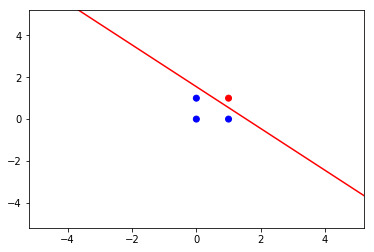

In [38]:
plt.scatter(X[:,0],X[:,1],c=['red' if i==1 else 'blue' for i in Y])
x2 = np.linspace(-5.2,5.2,100) # 100 numeros espaciados
plt.plot(x2,-w[0]/w[2]+m*x2,color='red')
plt.ylim([-5.2,5.2])
plt.xlim([-5.2,5.2])

In [211]:
sess.close()

In [232]:
X=np.asarray([[0,0],[0,1],[1,0],[1,1]])
Y=np.asarray([[0],[1],[1],[0]])

n=100.0
rok=[]
for i in range(int(n)):
    for s in range(int(n)):
        j=(i/n)*8-4
        k=(s/n)*8-4
        rok.append([j,k])

Colors=np.asarray(rok)

In [233]:
input_size=2
middle_size=2
output_layer_size=1
#Los placeholders son para los datos de entrada
x = tf.placeholder(tf.float32, [None, input_size])
y_ = tf.placeholder(tf.float32, [None, output_layer_size]) #la y real
#La variables para lo que se va a ir calculando y modificando en el camino
W_layer1=tf.Variable(tf.random_uniform([input_size,middle_size], -1, 1), name="W_layer1")
W_layer2=tf.Variable(tf.random_uniform([middle_size,output_layer_size], -1, 1), name="W_layer2")
b_layer1 = tf.Variable(tf.zeros([middle_size]), name="b_layer1")
b_layer2 = tf.Variable(tf.zeros([output_layer_size]), name="b_layer2")

In [234]:
y = tf.nn.sigmoid(tf.matmul(tf.nn.sigmoid(tf.matmul(x,W_layer1)+b_layer1),W_layer2)+b_layer2) #la de nuestra
lossfn = tf.reduce_mean(tf.reduce_sum((y_-y)**2)) #cuadratico
#lossfn= tf.reduce_mean(( (y_ * tf.log(y)) +  
# ((1 - y_) * tf.log(1.0 - y)) ) * -1) # cross entropy
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(lossfn)

In [235]:
init = tf.global_variables_initializer()
sess = tf.Session() # tipo de sesion, puede ser interactiva


In [236]:
sess.run(init)
for i in range(50000):
  sess.run(train_step, feed_dict={x: X, y_: Y})

In [252]:
#imprimir alguna variable
print(sess.run(y, feed_dict={x:[[1,0]]}))
print(sess.run(W_layer1, feed_dict={x: X, y_: Y}))

[[ 0.94688213]]
[[-5.64438438 -3.89277625]
 [-5.7887311  -3.91802335]]


In [238]:
Colors_y=sess.run(y, feed_dict={x:Colors})

In [239]:
correct_prediction = tf.equal(tf.round(y),y_) # aca estams definiendo otras operacioes
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: X, y_: Y})) # las corremos

1.0


In [240]:
w=[sess.run(b_layer1, feed_dict={x: X, y_: Y})[0]]+[i[0] for i in sess.run(W_layer1, feed_dict={x: X, y_: Y})]

In [241]:
m=((w[0]/w[2]))/((-w[0]/w[1]))
print -w[0]/w[1], -w[0]/w[2], m

0.379633 0.370167 -0.975064


(-5.2, 5.2)

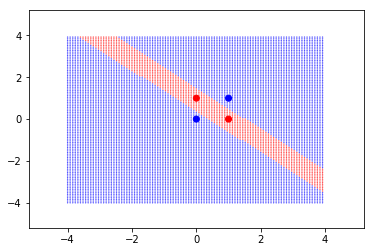

In [256]:
plt.scatter(X[:,0],X[:,1],c=['red' if i==1 else 'blue' for i in Y])
plt.scatter(Colors[:,0],Colors[:,1],c=['red' if round(i)==1 else 'blue' for i in Colors_y], s=0.1)
x2 = np.linspace(-5.2,5.2,100) # 100 numeros espaciados
plt.ylim([-5.2,5.2])
plt.xlim([-5.2,5.2])

In [302]:
sess.close()

In [319]:
n=20.0
rok=[]
for i in range(int(n)):
    for s in range(int(n)):
        j=(i/n)*8-4
        k=(s/n)*8-4
        rok.append([j,k])

X=np.asarray(rok)
Y=[]
for x in rok:
    i=0
    for s in x:
        i=i+s**2
    if i<=4:
        Y.append([0])
    else:
        Y.append([1])
Y=np.asarray(Y)
X=np.asarray(X)

n=100.0
rok=[]
for i in range(int(n)):
    for s in range(int(n)):
        j=(i/n)*8-4
        k=(s/n)*8-4
        rok.append([j,k])

Colors=np.asarray(rok)

In [320]:
len(Y)

400

[[ 0.72389299]]
[[-3.11448288]
 [-0.53281522]]
Accuracy: 
0.8075


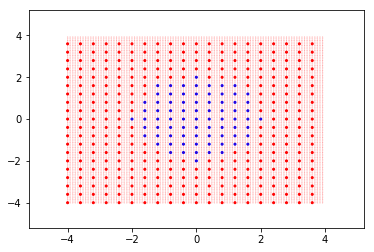

[[ 0.47753343]]
[[ 0.44548035 -0.4326891 ]
 [ 2.50355506  2.38972902]]
Accuracy: 
0.805


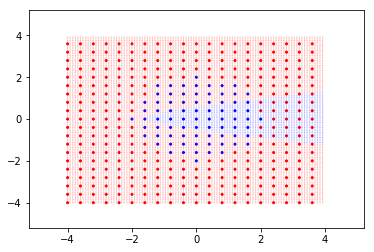

[[ 0.01734002]]
[[ 2.08454895  1.38373911 -0.58480483]
 [-0.54806995  1.41491282  2.06971741]]
Accuracy: 
0.975


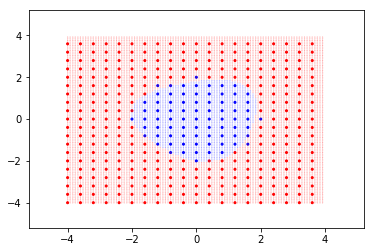

[[ 0.00991418]]
[[-3.23995376  3.17843843 -0.01139956 -0.14763965]
 [-0.06579239 -0.1419944   3.09404969 -3.45480084]]
Accuracy: 
0.985


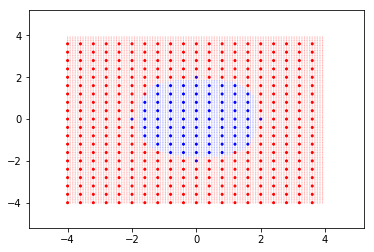

[[ 0.00262144]]
[[-1.0328325  -0.81888121  2.27348733  2.26031637 -2.75296354]
 [ 1.87180161 -1.81791663  1.59967828  0.24618943  1.24115634]]
Accuracy: 
0.99


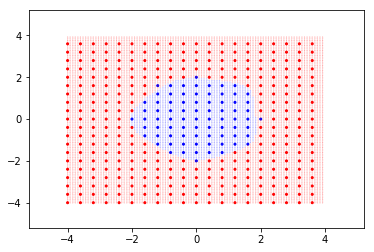

[[ 0.00493063]]
[[-0.19860882 -2.3004632  -0.03490215 -2.93973517 -0.62840903 -2.88997602]
 [-0.17858967  1.14760077 -3.23929    -0.71395129  2.60881019 -1.03481412]]
Accuracy: 
0.9875


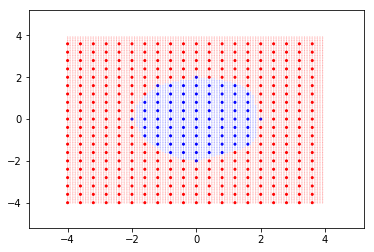

[[ 0.00214291]]
[[ 1.82894385 -1.19657063  3.11843276 -1.18038774  1.17339289  0.39488357
  -2.95118737]
 [ 1.90925634 -2.18290424  0.39660805  2.18903923 -2.06907654  0.96618539
   0.88626331]]
Accuracy: 
0.9875


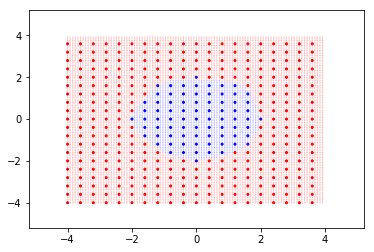

[[ 0.00203247]]
[[-3.02769446 -1.14074373  1.27010369  1.34220004  1.63948059 -0.6113348
  -2.89894915  1.55464518]
 [-0.02196439  2.44927073  2.43741274  0.70139164 -1.00295496 -2.92280793
   0.74527204  1.06937242]]
Accuracy: 
0.9875


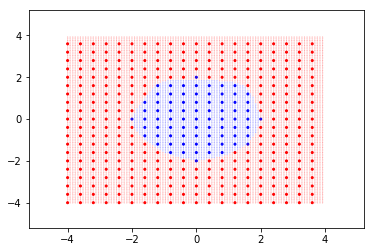

[[ 0.00366283]]
[[ 1.31012774  1.20863438  2.55716348 -1.31898713  2.85081601  1.32045019
  -0.08864807 -0.06746198 -1.93064678]
 [ 0.57808721  1.04258668 -0.26808643  2.76957297 -1.34882259  1.72177851
  -2.76728392  0.3613424  -1.88956511]]
Accuracy: 
0.985


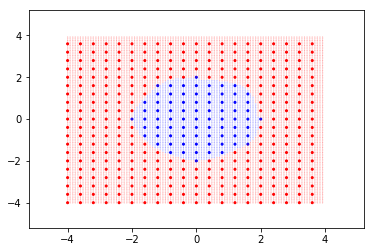

In [334]:
accuracies=[]
input_size=2
for mid in [1,2,3,4,5, 6, 7, 8, 9]:
    middle_size=mid
    output_layer_size=1
    #Los placeholders son para los datos de entrada
    x = tf.placeholder(tf.float32, [None, input_size])
    y_ = tf.placeholder(tf.float32, [None, output_layer_size]) #la y real
    #La variables para lo que se va a ir calculando y modificando en el camino
    W_layer1=tf.Variable(tf.random_uniform([input_size,middle_size], -1, 1), name="W_layer1")
    W_layer2=tf.Variable(tf.random_uniform([middle_size,output_layer_size], -1, 1), name="W_layer2")
    b_layer1 = tf.Variable(tf.zeros([middle_size]), name="b_layer1")
    b_layer2 = tf.Variable(tf.zeros([output_layer_size]), name="b_layer2")
    y = tf.nn.sigmoid(tf.matmul(tf.nn.sigmoid(tf.matmul(x,W_layer1)+b_layer1),W_layer2)+b_layer2) #la de nuestra
    lossfn = tf.reduce_mean(tf.reduce_sum((y_-y)**2)) #cuadratico
    #lossfn= tf.reduce_mean(( (y_ * tf.log(y)) +  
    # ((1 - y_) * tf.log(1.0 - y)) ) * -1) # cross entropy
    train_step = tf.train.GradientDescentOptimizer(0.01).minimize(lossfn)
    init = tf.global_variables_initializer()
    sess = tf.Session() # tipo de sesion, puede ser interactiva
    sess.run(init)
    for i in range(2000):
      sess.run(train_step, feed_dict={x: X, y_: Y})
    #imprimir alguna variable
    print(sess.run(y, feed_dict={x:[[1,0]]}))
    print(sess.run(W_layer1, feed_dict={x: X, y_: Y}))
    Colors_y=sess.run(y, feed_dict={x:Colors})
    correct_prediction = tf.equal(tf.round(y),y_) # aca estams definiendo otras operacioes
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    accuracies.append(sess.run(accuracy, feed_dict={x: X, y_: Y}))
    print("Accuracy: ")
    print(sess.run(accuracy, feed_dict={x: X, y_: Y})) # las corremos
    plt.scatter(X[:,0],X[:,1],c=['red' if i==1 else 'blue' for i in Y], s=4)
    plt.scatter(Colors[:,0],Colors[:,1],c=['red' if round(i)==1 else 'blue' for i in Colors_y], s=0.015)
    x2 = np.linspace(-5.2,5.2,100) # 100 numeros espaciados
    plt.ylim([-5.2,5.2])
    plt.xlim([-5.2,5.2])
    plt.show()
    plt.clf()
    sess.close()

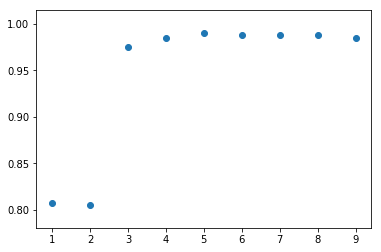

In [335]:
plt.scatter([1,2,3,4,5,6,7,8,9],accuracies)

Al principio la aproximación es muy mala (con una sola capa de enmedio, prefiere predecir que todo está afuera del círculo), tiene una mejora grande al llegar a la tercera capa, y luego sube lentamente hasta estabilizarse por 0.985